# Risk analysis

### Generating data

In [1]:
# Importing and data
import theano.tensor as T
import theano
import sys, os
sys.path.append("../GeMpy")

# Importing GeMpy modules
import GeMpy

# Reloading (only for development purposes)
#import importlib
#importlib.reload(GeMpy)

# Usuful packages
import numpy as np
import pandas as pn

import matplotlib.pyplot as plt

# This was to choose the gpu
os.environ['CUDA_LAUNCH_BLOCKING'] = '1'

# Default options of printin
np.set_printoptions(precision = 6, linewidth= 130, suppress =  True)

%matplotlib inline
#%matplotlib notebook



# Importing the data from csv files and settign extent and resolution
geo_data = GeMpy.import_data([0,2000,0,2000,-2000,0],[ 40, 40, 40],
                         path_f = os.pardir+"/input_data/Fab_Foliations.csv",
                         path_i = os.pardir+"/input_data/Fab_Points.csv")

In [2]:
# Assigning series to formations as well as their order (timewise)
GeMpy.set_data_series(geo_data, {"fault":geo_data.formations[2], 
                      "Rest":np.delete(geo_data.formations, 2)},
                       order_series = ["fault",
                                       "Rest",
                                       ], verbose=0)

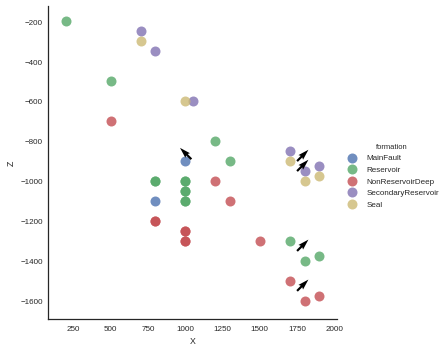

In [3]:
GeMpy.plot_data(geo_data, direction='y')

In [4]:
#geo_data_s = GeMpy.select_series(geo_data, ["Rest"])

In [5]:
# Select series to interpolate (if you do not want to interpolate all)
data_interp = GeMpy.set_interpolator(geo_data, verbose = [])

[2, 2]


In [6]:
# This are the shared parameters and the compilation of the function. This will be hidden as well at some point
input_data_T = data_interp.interpolator.tg.input_parameters_list()

In [7]:
data_interp.interpolator.tg.len_series_i.get_value()

array([ 0,  1, 36])

In [8]:
# HERE when we compile we have to pass the number of formations that are faults!!
debugging = theano.function(input_data_T, data_interp.interpolator.tg.whole_block_model(1), on_unused_input='ignore', 
                            allow_input_downcast=True, profile=True);

In [9]:
# This prepares the user data to the theano function
input_data_P = data_interp.interpolator.data_prep() 

None


In [14]:
# Solution of theano
sol = debugging(input_data_P[0], input_data_P[1], input_data_P[2], input_data_P[3],input_data_P[4], input_data_P[5])

In [15]:
sol

array([ 0.,  0.,  0., ...,  2.,  2.,  2.])

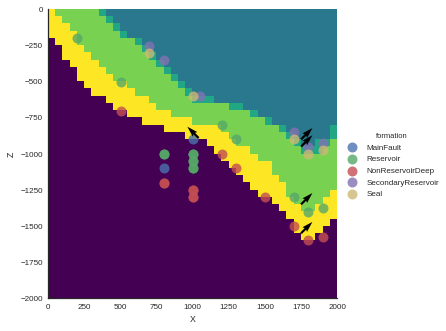

In [16]:
#GeMpy.plot_potential_field(fault1, sol.reshape(50,50,50),13, plot_data = True)

GeMpy.plot_section(geo_data, 20, direction="y", block = sol, plot_data = True)

In [12]:
# Plotting nice 3D
GeMpy.PlotData(geo_data).plot3D_steno(sol_s, 'Fabian Projec', description='Fixed in principle', plot=False)


>> Welcome to the Python client library for Steno3D!

Credentials file found: /home/miguel/.steno3d_client/credentials
Accessing API developer key for @leguark
Welcome to Steno3D! You are logged in as @leguark
Verifying your quota for public projects...
This PUBLIC project will be viewable by everyone.
Total progress: 100% - Uploading: project Fabian Projec
Complete!
https://steno3d.com/resource/volume/qgrMrDuEQjCBMADj31DP


In [30]:
# Cheaper 3D plot
# So far this is a simple 3D visualization. I have to adapt it into GeMpy 

lith0 = sol == 0
lith1 = sol == 2
lith2 = sol == 3
lith3 = sol == 4
lith4 = sol == 5
np.unique(sol)

import ipyvolume.pylab as p3

p3.figure(width=800)

p3.scatter(geo_data.grid.grid[:,0][lith0],
           geo_data.grid.grid[:,1][lith0],
           geo_data.grid.grid[:,2][lith0], marker='box', color = 'blue', size = 0.1 )

p3.scatter(geo_data.grid.grid[:,0][lith1],
           geo_data.grid.grid[:,1][lith1],
           geo_data.grid.grid[:,2][lith1], marker='box', color = 'yellow', size = 1 )

p3.scatter(geo_data.grid.grid[:,0][lith2],
           geo_data.grid.grid[:,1][lith2],
           geo_data.grid.grid[:,2][lith2], marker='box', color = 'green', size = 1 )

p3.scatter(geo_data.grid.grid[:,0][lith3],
           geo_data.grid.grid[:,1][lith3],
           geo_data.grid.grid[:,2][lith3], marker='box', color = 'pink', size = 1 )

p3.scatter(geo_data.grid.grid[:,0][lith4],
           geo_data.grid.grid[:,1][lith4],
           geo_data.grid.grid[:,2][lith4], marker='box', color = 'red', size = 1 )

#p3.xlim(np.min(geo_data.grid.grid[:,0]),np.min(geo_data.grid.grid[:,0]))
#p3.ylim(np.min(geo_data.grid.grid[:,1]),np.max(geo_data.grid.grid[:,1]))
#p3.zlim(np.min(geo_data.grid.grid[:,2]),np.min(geo_data.grid.grid[:,2]))#np.max(geo_data.grid.grid[:,2]))

p3.show()

## PyMC3

Input data is a list of arrays with the different values as follows

- Dips position
- Dip Angles
- Azimuth
- Polarity
- Interfaces points:
    - Reference  points
    - Rest points

In [20]:
input_data_P

[array([[ 0.497806,  0.5001  ,  0.502522],
        [ 0.679587,  0.5001  ,  0.384715],
        [ 0.679587,  0.5001  ,  0.333433],
        [ 0.679587,  0.5001  ,  0.5001  ],
        [ 0.679587,  0.5001  ,  0.487279]], dtype=float32),
 array([-45.      ,  45.      ,  45.099998,  45.      ,  45.      ], dtype=float32),
 array([ 90.     ,  90.     ,  94.82679,  90.     ,  90.     ], dtype=float32),
 array([ 1.,  1.,  1.,  1.,  1.], dtype=float32),
 array([[ 0.435997,  0.5001  ,  0.448818],
        [ 0.435997,  0.294972,  0.474459],
        [ 0.435997,  0.294972,  0.474459],
        [ 0.435997,  0.294972,  0.474459],
        [ 0.435997,  0.294972,  0.474459],
        [ 0.435997,  0.294972,  0.474459],
        [ 0.435997,  0.294972,  0.474459],
        [ 0.435997,  0.294972,  0.474459],
        [ 0.435997,  0.294972,  0.474459],
        [ 0.435997,  0.294972,  0.474459],
        [ 0.435997,  0.294972,  0.474459],
        [ 0.435997,  0.294972,  0.474459],
        [ 0.435997,  0.294972,  0.474

It is important to notice that in the array ref_layer_points, the values are tiled so it would be necessary to change all of them. At some point it would be nice to tile them in theano I guess.

So the next step is to compile the theano graph that creates the GeMpy model, not as a function but as a theano operation. Basically this is like compress a bunch of theano operations in one

In [19]:
# Everytime you want to compile the theano graph just reset all the theano shared with the next 3 lines of code. I am 
# investigating to try to avoid it but in any case at some point it will be hidden to the user

data_interp = GeMpy.set_interpolator(geo_data)
# This are the shared parameters and the compilation of the function. This will be hidden as well at some point
input_data_T = data_interp.interpolator.tg.input_parameters_list()
# This prepares the user data to the theano function
input_data_P = data_interp.interpolator.data_prep() 



geomodel = theano.OpFromGraph(input_data_T, [data_interp.interpolator.tg.whole_block_model(1)], on_unused_input='ignore')

[2, 2]
None


Because now the GeMpy model is a theano operation and not a theano function, to call it we need to use theano variables (with theano functions we call them with python variables). This is very easy to modify, we just need to use theano shared to convert our python input data into theano variables.

The pymc3 objects are already theano variables (pm.Normal and so on). Now the trick is that using the theano function T.set_subtensor, we can change one deterministic value of the input arrays(the ones printed in the cell above) by a stochastic pymc3 object. Then with the new arrays we just have to call the theano operation and pymc will do the rest

In [70]:
# This is the creation of the model
import pymc3 as pm
theano.config.compute_test_value = 'ignore'
model = pm.Model()
with model:
    # Stochastic value
    foliation = pm.Normal('foliation', -45, sd=10)
    
    # We convert a python variable to theano.shared
    dips = theano.shared(input_data_P[1])
    
    # We add the stochastic value to the correspondant array
    dips = T.set_subtensor(dips[1:], foliation)

    geo_model = pm.Deterministic('GeMpy', geomodel(theano.shared(input_data_P[0]), dips, 
                                     theano.shared(input_data_P[2]), theano.shared(input_data_P[3]),
                                     theano.shared(input_data_P[4]), theano.shared(input_data_P[5])))

In [71]:
# This is the sampling
# BEFORE RUN THIS FOR LONG CHECK IN THE MODULE THEANOGRAF THAT THE FLAG THEANO OPTIMIZER IS IN 'fast_run'!!
with model:
    trace = pm.sample(10)

Auto-assigning NUTS sampler...
Initializing NUTS using advi...
Average ELBO = -0.00093204: 100%|██████████| 200000/200000 [00:07<00:00, 27525.19it/s]
Finished [100%]: Average ELBO = -0.0109
100%|██████████| 10/10 [00:01<00:00,  6.14it/s]


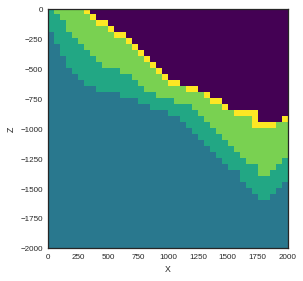

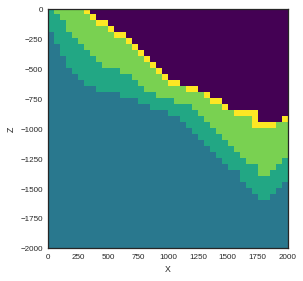

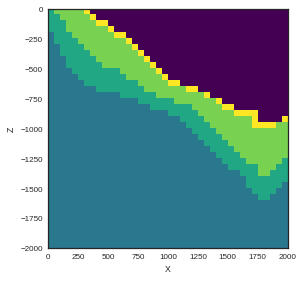

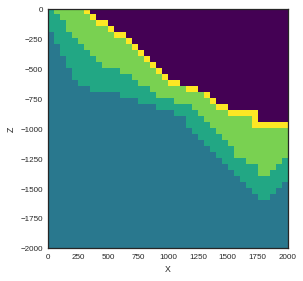

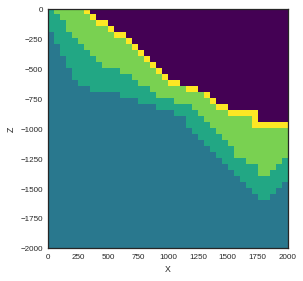

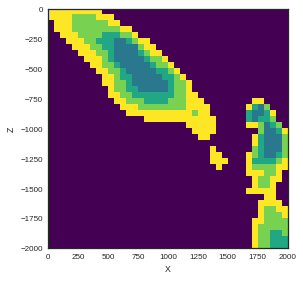

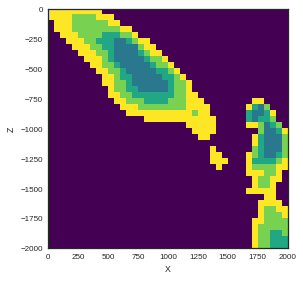

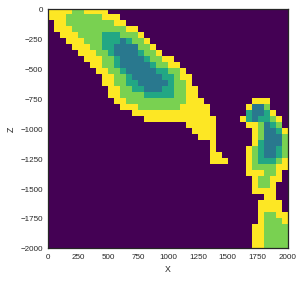

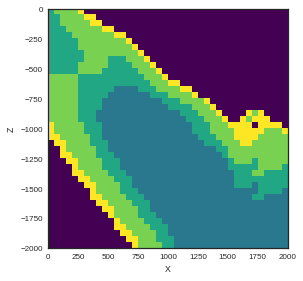

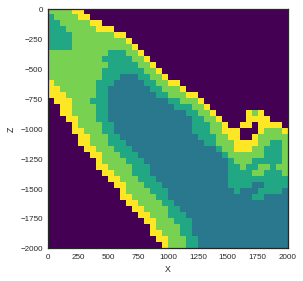

In [74]:
for i in trace.get_values('GeMpy'):
    GeMpy.plot_section(geo_data, 20, direction = 'y', block = i, plot_data = False)
    plt.show()

In [69]:
# Cheaper 3D plot
# So far this is a simple 3D visualization. I have to adapt it into GeMpy 

sol = trace['GeMpy'][5]

lith0 = sol == 0
lith1 = sol == 2
lith2 = sol == 3
lith3 = sol == 4
lith4 = sol == 5

import ipyvolume.pylab as p3

p3.figure(width=800)

blue = p3.scatter(geo_data.grid.grid[:,0][lith0],
           geo_data.grid.grid[:,1][lith0],
           geo_data.grid.grid[:,2][lith0], marker='box', color = 'blue', size = 0.1 )

p3.scatter(geo_data.grid.grid[:,0][lith1],
           geo_data.grid.grid[:,1][lith1],
           geo_data.grid.grid[:,2][lith1], marker='box', color = 'yellow', size = 2.2 )

p3.scatter(geo_data.grid.grid[:,0][lith2],
           geo_data.grid.grid[:,1][lith2],
           geo_data.grid.grid[:,2][lith2], marker='box', color = 'green', size = 2.2 )

p3.scatter(geo_data.grid.grid[:,0][lith3],
           geo_data.grid.grid[:,1][lith3],
           geo_data.grid.grid[:,2][lith3], marker='box', color = 'pink', size = 2.2 )

p3.scatter(geo_data.grid.grid[:,0][lith4],
           geo_data.grid.grid[:,1][lith4],
           geo_data.grid.grid[:,2][lith4], marker='box', color = 'red', size = 2.2 )

#p3.xlim(np.min(geo_data.grid.grid[:,0]),np.min(geo_data.grid.grid[:,0]))
#p3.ylim(np.min(geo_data.grid.grid[:,1]),np.max(geo_data.grid.grid[:,1]))
#p3.zlim(np.min(geo_data.grid.grid[:,2]),np.min(geo_data.grid.grid[:,2]))#np.max(geo_data.grid.grid[:,2]))

#p3.show()

from ipywidgets import FloatSlider, ColorPicker, VBox, jslink
size = FloatSlider(min=0, max=30, step=0.1)
size_selected = FloatSlider(min=0, max=30, step=0.1)
color = ColorPicker()
color_selected = ColorPicker()
jslink((blue, 'size'), (size, 'value'))
#jslink((blue, 'size_selected'), (size_selected, 'value'))
#jslink((quiver, 'color'), (color, 'value'))
#jslink((quiver, 'color_selected'), (color_selected, 'value'))
VBox([p3.gcc(), size])

In [51]:
# The uncertainty in this case is minimum but you get the idea
(trace['GeMpy'][0]-trace['GeMpy'][2]).sum()

-70.0

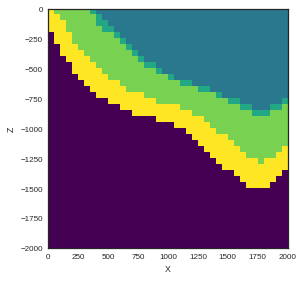

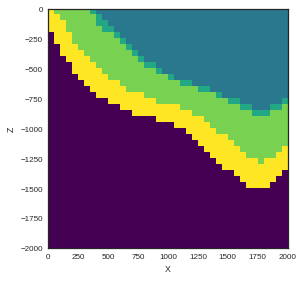

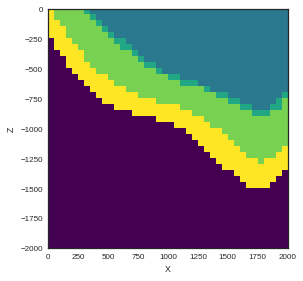

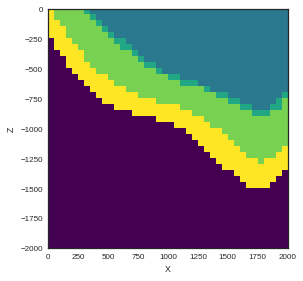

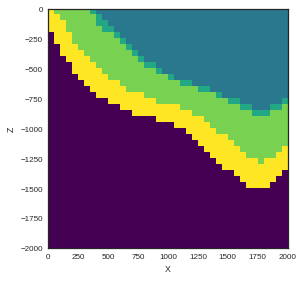

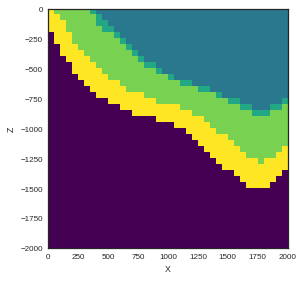

In [44]:
for i in trace.get_values('GeMpy'):
    GeMpy.plot_section(geo_data, 13, block = i, plot_data = False)
    plt.show()